# 02. Neural Network Classification with TensorFlow

Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

### What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a classification model
* Input shapes and output shapes
    * X: features/data (inputs)
    * y: labels (outputs)
        * "What class do the inputs belong to?"
* Creating custom data to view and fit
* Steps in modelling for binary and mutliclass classification
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
            * Finding the best learning rate
        *Creating evaluation metrics
    * Fitting a model (getting it to find patterns in our data)
    * Improving a model
* The power of non-linearity
* Evaluating classification models
    * Visualizng the model ("visualize, visualize, visualize")
    * Looking at training curves
    * Compare predictions to ground truth (using our evaluation metrics)

### How you can use this notebook

You can read through the descriptions and the code (it should all run, except for the cells which error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.

### Typical architecture of a classification neural network

The word typical is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:

* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

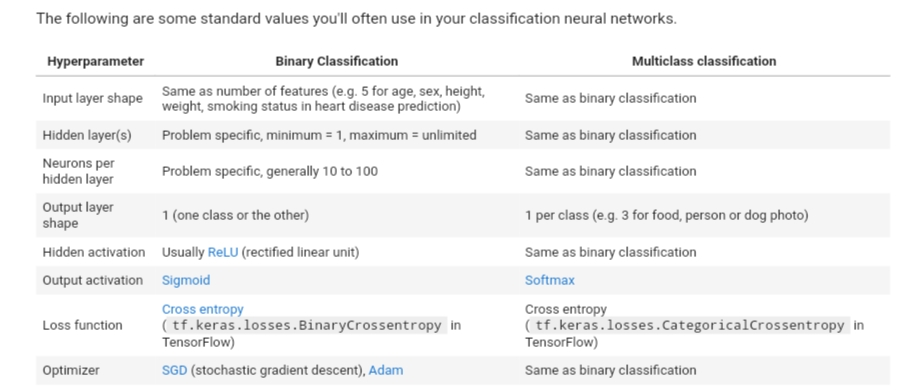

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron

Don't worry if not much of the above makes sense right now, we'll get plenty of experience as we go through this notebook.

Let's start by importing TensorFlow as the common alias tf. For this notebook, make sure you're using version 2.x+.

In [1]:
# Import tesnorflow

import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles


# Make 1000 example
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[0:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
# Let's visualize the data

import pandas as pd
circles =  pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "label" : y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

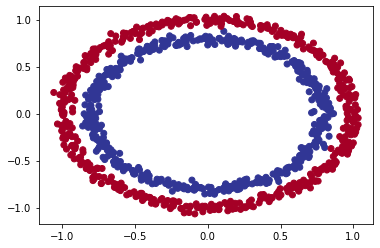

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap= plt.cm.RdYlBu);


🛠 Practice: Before pushing forward, you might want to spend 10 minutes playing around with the TensorFlow Playground. Try adjusting the different hyperparameters you see and click play to see a neural network train. I think you'll find the data very similar to what we've just created.

## Input and Output shapes

One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input X and get our model to predict y.

So let's check out the shapes of X and y.

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

## Steps in Modelling

In [10]:
# Set a Random Seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the Model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)                

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4820


In [11]:
# Lets Train our Model for longer

model_1.fit(X, y, epochs=200, verbose=0)

In [12]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

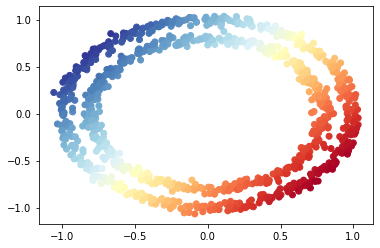

In [13]:
pred = model_1.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap= plt.cm.RdYlBu);

### Let's add an extra layer

In [14]:
# Set a Random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

# 3. Fit the model
model_2.fit(X, y ,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

32/32 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5120
Epoch 84/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4830
Epoch 86/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4830
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4860
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4910
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4970
Epoch 92/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4910
Epoch 93/100


In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

## Add more Hidden Units, Layers, and Use Adam Optimizers

In [16]:
# Set a Random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

# 2. Compile a Model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

32/32 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.4480
Epoch 84/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.4970
Epoch 85/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.4590
Epoch 86/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.4900
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6977 - accuracy: 0.4550
Epoch 88/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6981 - accuracy: 0.4590
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.4750
Epoch 90/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6981 - accuracy: 0.4620
Epoch 91/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 92/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.4760
Epoch 93/100


## Add Activation Layers to Hidden Units

In [17]:
# Set a Random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

# 2. Compile a Model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

32/32 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.4480
Epoch 84/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.4970
Epoch 85/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.4590
Epoch 86/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.4900
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.4550
Epoch 88/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4590
Epoch 89/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.4750
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4620
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 92/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.4760
Epoch 93/100


In [18]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max  = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1  
    y_min, y_max  = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 
    
    # np.meshgrid ( gives coordinates of every point in the plot)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # Coordinates of the plot 
    
    # Create X0, X0 values of coordinates, because we'll predict and give it a color
    # np.c_ (gives concatenates into column1, column2 etc)
    # np.ravel (flattens into 1D array)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    # Make prediction to color the plot coordinates
    y_pred  = model.predict(x_in)
    
    # Check for multi-class
    if model.output_shape[-1] > 1:  # checks the final dimension of the model's output shape
        print("Doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    #plt.scatter(X[:, 0], X[:, 1], c=pred, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
        

Now we've got a function to plot our model's decision boundary (the cut off point its making between red and blue dots), let's try it out.

doing binary classifcation...


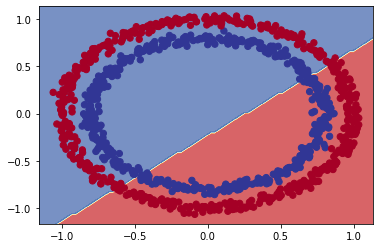

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [20]:
# Set random seed
tf.random.set_seed(42)


# Create some regression data
X_regression =  np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [21]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 3ms/step - loss: 38.8399 - mae: 38.8399
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 4ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 4ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 4ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 38.5599 - mae: 38.5599
Epoch 97/100
5/5 [==============================] - 0s 4ms/step

In [22]:
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 38.1030 - mae: 38.1030
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 37.9900 - mae: 37.9900
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 38.0777 - mae: 38.0777
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 37.9455 - mae: 37.9455
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 37.9856 - mae: 37.9856
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 37.9581 - mae: 37.9581
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 38.1302 - mae: 38.1302
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 38.0093 - mae: 38.0093
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 37.6469 - mae: 37.6469
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 37.8143 - mae: 37.8143
Epoch 11/100
5/5 [==============================] - 0s 4ms/

5/5 [==============================] - 0s 3ms/step - loss: 32.0629 - mae: 32.0629
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 29.9597 - mae: 29.9597
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 29.5577 - mae: 29.5577
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 29.1003 - mae: 29.1003
Epoch 91/100
5/5 [==============================] - 0s 3ms/step - loss: 29.2887 - mae: 29.2887
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 28.7780 - mae: 28.7780
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 28.6143 - mae: 28.6143
Epoch 94/100
5/5 [==============================] - 0s 4ms/step - loss: 29.8641 - mae: 29.8641
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 29.3196 - mae: 29.3196
Epoch 96/100
5/5 [==============================] - 0s 4ms/step - loss: 28.2315 - mae: 28.2315
Epoch 97/100
5/5 [==============================] - 0s 4ms/step

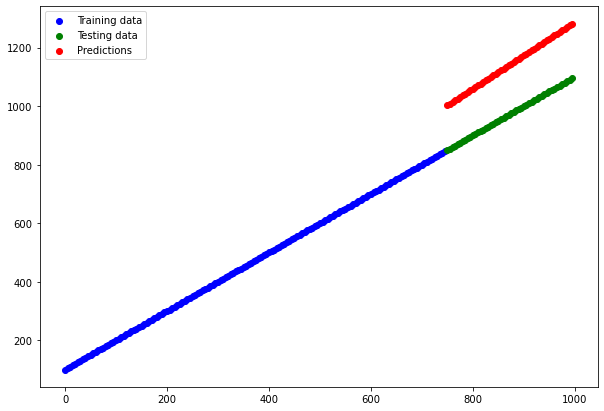

In [23]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [24]:
y_reg_preds.shape, X_reg_test.shape

((50, 1), (50,))

In [25]:
X_regression,y_regression 

(array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
        845, 850, 855, 860, 865, 870, 875, 880, 885

In [26]:
model_3.weights[0]

<tf.Variable 'dense_9/kernel:0' shape=(1, 100) dtype=float32, numpy=
array([[ 6.95685744e-02, -1.83991306e-02, -7.86569640e-02,
        -2.34655757e-02, -2.03956291e-01,  7.89190084e-02,
         1.06082425e-01,  1.62350103e-01, -1.39038652e-01,
        -1.41555637e-01, -9.69702601e-02,  1.14431143e-01,
        -1.80971995e-01,  1.36280917e-02,  1.92802269e-02,
         1.79340288e-01, -2.45764211e-01,  1.20267440e-02,
         7.21463487e-02, -1.28893808e-01,  6.73120767e-02,
         2.65228935e-02, -1.97522625e-01,  9.20735598e-02,
         6.30627424e-02, -8.01627785e-02,  3.92892510e-02,
        -1.48028746e-01,  1.79245219e-01, -2.22607423e-02,
         2.05450535e-01, -1.31467819e-01,  1.58836618e-01,
         6.78648520e-03, -1.03494589e-04, -1.27540529e-01,
         1.73338845e-01,  1.62095100e-01, -6.49761111e-02,
         7.48337209e-02, -1.13767013e-01,  1.40902668e-01,
         2.24048823e-01, -1.99072108e-01,  1.31823689e-01,
         8.26589763e-02,  4.69699204e-02, -1.6

## The Missing Piece: Non Linearity
Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

In [27]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])


# 2. Compile the model
model_4.compile(loss = "BinaryCrossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.6463 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5734 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8241 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7819 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7589 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7423 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7305 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7206 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7136 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.4920
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4750
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5100
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4990
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4890
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4680
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4670
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4570
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.4800
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5060
Epoch 93/100


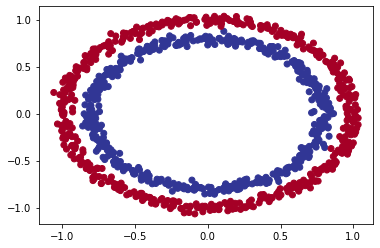

In [28]:
# Check how data looks like
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu);

doing binary classifcation...


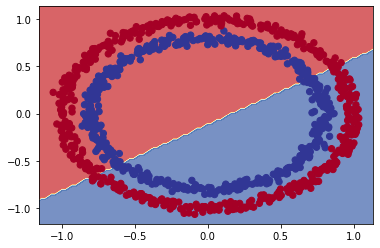

In [29]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

## Let's try adding the activation layer 

In [30]:
# Set the random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)  # Output Layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/

32/32 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5070
Epoch 85/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4680
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4590
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4980
Epoch 91/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.4910
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.4850
Epoch 93/100


## Let's Add Activation layer, increase hidden units and layers together

In [31]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'), # Hidden layer 1, 4 Neurons
    tf.keras.layers.Dense(4, activation = 'relu'), # Hidden layer 2, 4 Neurons
    tf.keras.layers.Dense(1)                       # Output
])

# Compile the model
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
               metrics = ['accuracy'])

# Fit the Model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/100


In [32]:
# Evaluate the Model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

We're still hitting 50% accuracy, our model is still practically as good as guessing.

How do the predictions look?

doing binary classifcation...


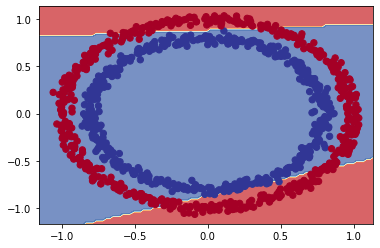

In [33]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

What gives?

It seems like our model is the same as the one in the TensorFlow Playground but model it's still drawing straight lines...

Ideally, the yellow lines go on the inside of the red circle and the blue circle.

Okay, okay, let's model this circle once and for all.

One more model (I promise... actually, I'm going to have to break that promise... we'll be building plenty more models).

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

## Add a Activation Layer to Output

In [34]:
tf.random.set_seed(42)


model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'), # Hidden layer 1, 4 Neurons
    tf.keras.layers.Dense(4, activation = 'relu'), # Hidden layer 2, 4 Neurons
    tf.keras.layers.Dense(1, activation = 'sigmoid')                       # Output
])

# Compile the model
model_7.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
               metrics = ['accuracy'])

# Fit the Model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

32/32 [==============================] - 0s 6ms/step - loss: 0.4360 - accuracy: 0.9630
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.9690
Epoch 85/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4145 - accuracy: 0.9700
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4059 - accuracy: 0.9740
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3962 - accuracy: 0.9750
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3873 - accuracy: 0.9720
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3795 - accuracy: 0.9750
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.9750
Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.9840
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.9830
Epoch 93/100


Woah! It looks like our model is getting some incredible results, let's check them out.



In [35]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classifcation...


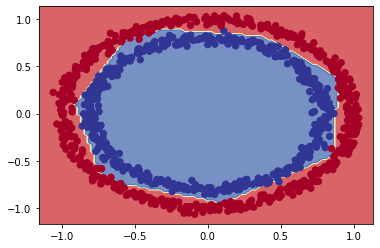

In [36]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

🤔 **Question**: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

🔑 **Note**: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.


Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [37]:
# Create a toy tensor (similar to the data we passed into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

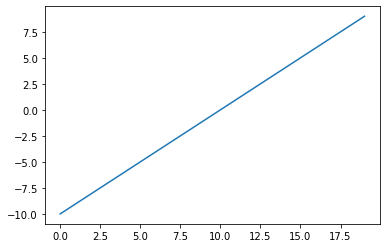

In [38]:
# Visualize our toy tensor
plt.plot(A);

A straight (linear) line!

Nice, now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

In [39]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid

def sigmoid(x):
    return 1/ (1 + tf.exp(-x))


# use the Sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

And how does it look?

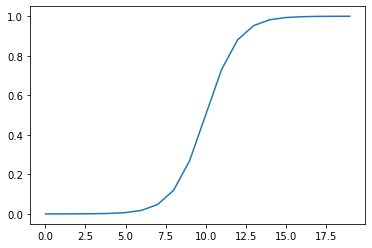

In [40]:
# Plot sigmoid modified tensor

plt.plot(sigmoid(A));

A non-straight (non-linear) line!

Okay, how about the ReLU function (ReLU turns all negatives to 0 and positive numbers stay the same)?

In [41]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

How does the ReLU-modified tensor look?

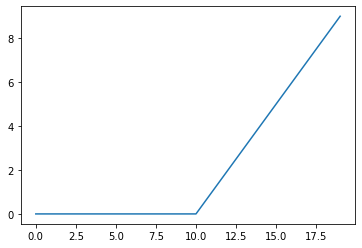

In [42]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

Another non-straight line!

Well, how about TensorFlow's linear activation function?

Well, how about TensorFlow's linear activation function?

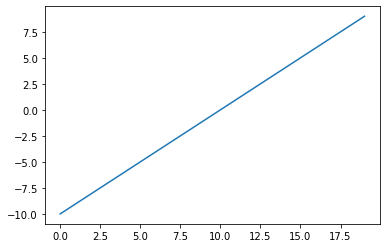

In [43]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
plt.plot(tf.keras.activations.linear(A))

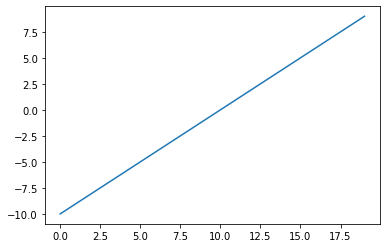

In [44]:
plt.plot(tf.keras.activations.linear(A))

Hmm, it looks like our inputs are unmodified...

In [45]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

Now rather than dive into the guts of neural networks, we're going to keep coding applying what we've learned to different problems but if you want a more in-depth look at what's going on behind the scenes, check out the Extra Curriculum section below.

📖 Resource: For more on activation functions, check out the machine learning cheatsheet page on them.

link- https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#

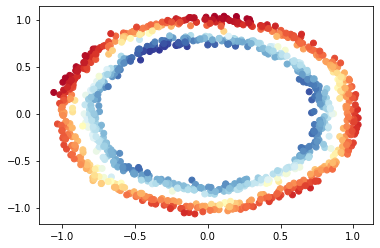

In [46]:
pred = model_7.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap= plt.cm.RdYlBu);

In [47]:
one = circles[circles['label'] == 1]

In [48]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'sigmoid'), # Hidden layer 1, 4 Neurons
    tf.keras.layers.Dense(50, activation = 'sigmoid'), # Hidden layer 2, 4 Neurons
    tf.keras.layers.Dense(1)                       # Output
])

# Compile the model
model_9.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
               metrics = ['mae'])

# Fit the Model
history = model_9.fit(one[['X0']], one[['X1']], epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 4ms/step - loss: 0.5854 - mae: 0.5854
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5419 - mae: 0.5419
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5308 - mae: 0.5308
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5226 - mae: 0.5226
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5249 - mae: 0.5249
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5147 - mae: 0.5147
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5401 - mae: 0.5401
Epoch 8/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5361 - mae: 0.5361
Epoch 9/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5109 - mae: 0.5109
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5178 - mae: 0.5178
Epoch 11/200
16/16 [==============================] - 0s 5m

16/16 [==============================] - 0s 4ms/step - loss: 0.5141 - mae: 0.5141
Epoch 88/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5110 - mae: 0.5110
Epoch 89/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5122 - mae: 0.5122
Epoch 90/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5137 - mae: 0.5137
Epoch 91/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5152 - mae: 0.5152
Epoch 92/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5147 - mae: 0.5147
Epoch 93/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5172 - mae: 0.5172
Epoch 94/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5192 - mae: 0.5192
Epoch 95/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5112 - mae: 0.5112
Epoch 96/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5117 - mae: 0.5117
Epoch 97/200
16/16 [==============================] - 0s 2ms/st

16/16 [==============================] - 0s 6ms/step - loss: 0.5127 - mae: 0.5127
Epoch 173/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5165 - mae: 0.5165
Epoch 174/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5138 - mae: 0.5138
Epoch 175/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5101 - mae: 0.5101
Epoch 176/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5126 - mae: 0.5126
Epoch 177/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5144 - mae: 0.5144
Epoch 178/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5101 - mae: 0.5101
Epoch 179/200
16/16 [==============================] - 0s 8ms/step - loss: 0.5126 - mae: 0.5126
Epoch 180/200
16/16 [==============================] - 0s 9ms/step - loss: 0.5095 - mae: 0.5095
Epoch 181/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5234 - mae: 0.5234
Epoch 182/200
16/16 [==============================] -

In [49]:
#one = circles[circles['label'] == 1]

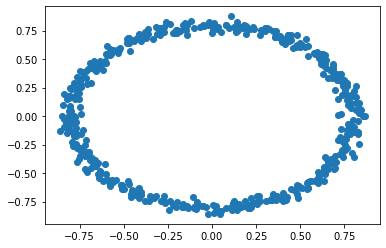

In [50]:
plt.scatter(one[['X0']], one[['X1']])

We can see that Neural Network Regression cannot predict the pattern in form of circle. Because one x value cannot have multiple y values very appart, like bottom of circle and top of circle. Prediction will be very bad.

<AxesSubplot:>

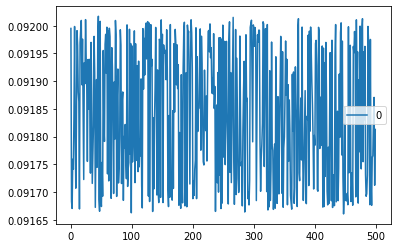

In [51]:
pd.DataFrame(model_9.predict(one[['X0']])).plot()

We can see it here.

### Let's create a non-linear line and predict it with help of neural network

In [52]:
import matplotlib.pyplot as plt
import numpy as np

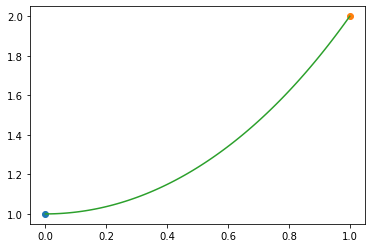

In [53]:
def draw_curve(p1, p2):
   a = (p2[1] - p1[1]) / (np.cosh(p2[0]) - np.cosh(p1[0]))
   b = p1[1] - a * np.cosh(p1[0])
   x = np.linspace(p1[0], p2[0], 100)
   y = a * np.cosh(x) + b
   return x, y

p1 = [0, 1]
p2 = [1, 2]
x, y = draw_curve(p1, p2)
plt.plot(p1[0], p1[1], 'o')
plt.plot(p2[0], p2[1], 'o')
plt.plot(x, y)
plt.show()

In [54]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'), # Hidden layer 1, 4 Neurons
    tf.keras.layers.Dense(50, activation = 'sigmoid'), # Hidden layer 2, 4 Neurons
    tf.keras.layers.Dense(1)                       # Output
])

# Compile the model
model_9.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
               metrics = ['mae'])

# Fit the Model

history = model_9.fit(tf.expand_dims(x, axis=-1), tf.expand_dims(y, axis=-1), epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 2.0370 - mae: 2.0370
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.8894 - mae: 1.8894
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.7420 - mae: 1.7420
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.5928 - mae: 1.5928
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4424 - mae: 1.4424
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2893 - mae: 1.2893
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1317 - mae: 1.1317
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9695 - mae: 0.9695
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.8010 - mae: 0.8010
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6260 - mae: 0.6260
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4450 

4/4 [==============================] - 0s 4ms/step - loss: 0.0381 - mae: 0.0381
Epoch 90/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0386 - mae: 0.0386
Epoch 91/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0365 - mae: 0.0365
Epoch 92/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0367 - mae: 0.0367
Epoch 93/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0340 - mae: 0.0340
Epoch 94/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0343 - mae: 0.0343
Epoch 95/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0330 - mae: 0.0330
Epoch 96/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0333 - mae: 0.0333
Epoch 97/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0317 - mae: 0.0317
Epoch 98/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0335 - mae: 0.0335
Epoch 99/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0314 - ma

4/4 [==============================] - 0s 4ms/step - loss: 0.0151 - mae: 0.0151
Epoch 177/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0105 - mae: 0.0105
Epoch 178/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0086 - mae: 0.0086
Epoch 179/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0092 - mae: 0.0092
Epoch 180/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0081 - mae: 0.0081
Epoch 181/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0088 - mae: 0.0088
Epoch 182/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0119 - mae: 0.0119
Epoch 183/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0092 - mae: 0.0092
Epoch 184/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0126 - mae: 0.0126
Epoch 185/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0104 - mae: 0.0104
Epoch 186/200
4/4 [==============================] - 0s 4ms/step - loss: 0

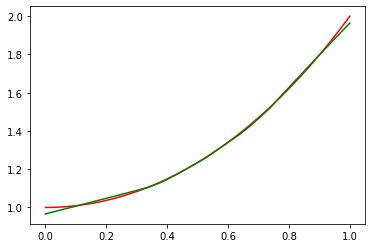

In [55]:
plt.subplots(1,1)
plt.plot(x, y, color='r')
plt.plot(x, model_9.predict(tf.expand_dims(x, axis=-1)), color='g')

Looks pretty Good!

## Evaluating and improving our classification model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [56]:
from sklearn.datasets import make_circles


# Make 1000 example
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [57]:
# How many examples are in the whole dataset?
len(X)

1000

In [58]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

Great, now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set.

In [59]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [60]:
# Evaluate the model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print("Loss :", loss)
print("Accuracy :", accuracy*100,"%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000
Loss : 0.1246885135769844
Accuracy : 100.0 %


100% accuracy? Nice!

Now, when we started to create model_8 we said it was going to be the same as model_7 but you might've found that to be a little lie.

That's because we changed a few things:

**The activation parameter** - We used strings ("relu" & "sigmoid") instead of using library paths (tf.keras.activations.relu), in TensorFlow, they both offer the same functionality.

**The learning_rate (also lr) parameter** - We increased the **learning rate** parameter in the Adam optimizer to 0.01 instead of 0.001 (an increase of 10x).
* You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a too high learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.

**The number of epochs** - We lowered the number of epochs (using the epochs parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
* One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

We know our model is performing well based on the evaluation metrics but let's see how it performs visually.

doing binary classifcation...
doing binary classifcation...


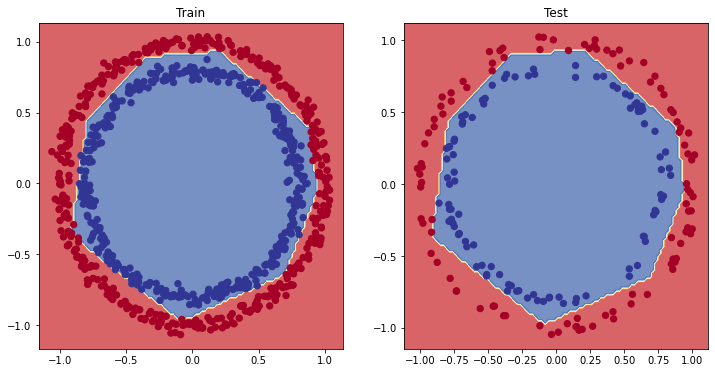

In [61]:
# Plot the decision boundaries  for the training and test sets
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Train')

plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')

plot_decision_boundary(model_8, X=X_test, y=y_test)

## Plot the loss(training) curve

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the **loss curves** (also referred to as the **learning curves**).

You might've seen we've been using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

Inspecting the outputs, we can see the loss values going down and the accuracy going up.

How's it look (visualize, visualize, visualize)?

Text(0.5, 1.0, 'Model_8 training curves')

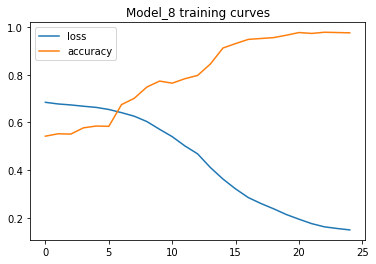

In [62]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

🔑 **Note**: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the Best learning Rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

In model_8 you saw we lowered the Adam optimizer's learning rate from the default of 0.001 (default) to 0.01.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

* A learning rate callback.
    * You can think of a callback as an extra piece of functionality you can add to your model while its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

🔑 **Note**: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [63]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_9.compile(loss = 'binary_crossentropy',
               optimizer="Adam",
               metrics = ["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4  * 10**(epoch/20))

# Fit the model (Passing the lr_scheduler callback)
history = model_9.fit(X_train, y_train, epochs=100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5382 - accuracy: 0.6888 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6783 - accuracy: 0.5800 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5507 - accuracy: 0.7538 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4724 - accuracy: 0.8075 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.7113 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6006 - accuracy: 0.6150 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5600 - accuracy: 0.6900 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5524 - accuracy: 0.6862 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5564 - accuracy: 0.6

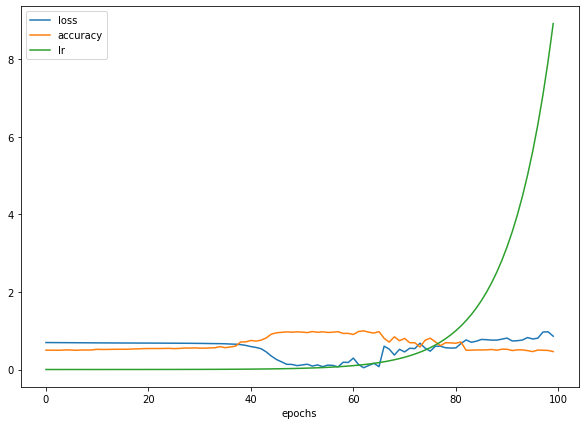

In [64]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs");

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

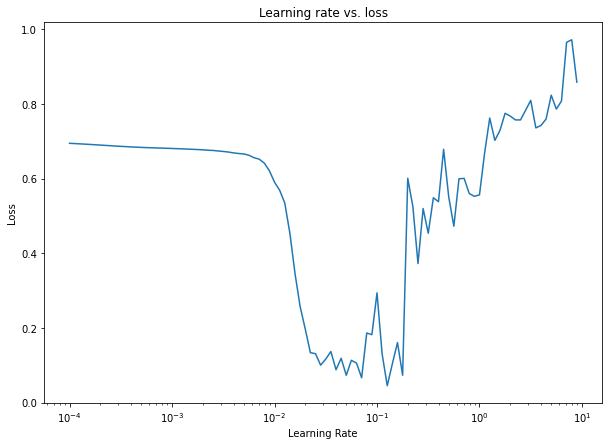

In [65]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 (10**2) and 0.02.

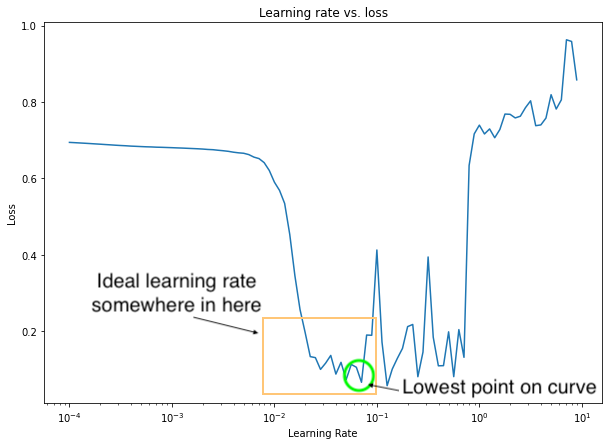

The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).

In [66]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001, 0.0001)

Now we've estimated the ideal learning rate (we'll use 0.02) for our model, let's refit it.

In [67]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.08), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6832 - accuracy: 0.5475
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.6313
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5046 - accuracy: 0.7812
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.9538
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9887
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9925
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9875
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1755 - accuracy: 0.9337
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9613
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9850
Epoch 11/20
25/25 [===========

Nice! With a little higher learning rate (0.02 instead of 0.01) we reach a higher accuracy than model_8 in less epochs (20 instead of 25).

🛠 **Practice**: Now you've seen an example of what can happen when you change the learning rate, try changing the learning rate value in the TensorFlow Playground and see what happens. What happens if you increase it? What happens if you decrease it?

In [68]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9800


[0.06213851273059845, 0.9800000190734863]

doing binary classifcation...
doing binary classifcation...


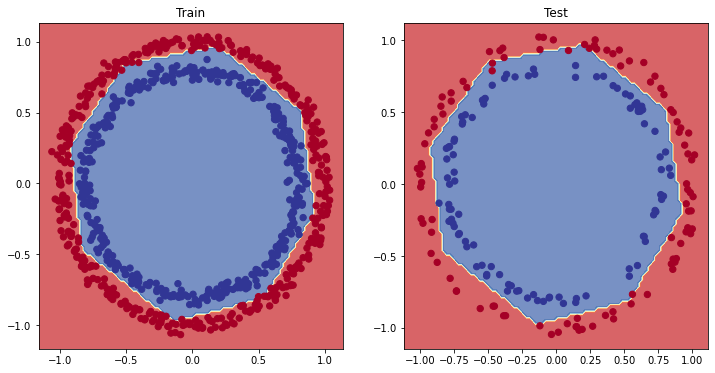

In [69]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

And as we can see, almost perfect again.

These are the kind of experiments you'll be running often when building your own models.

Start with default settings and see how they perform on your data.

And if they don't perform as well as you'd like, improve them.

Let's look at a few more ways to evaluate our classification models.

## More Classification Evaluation Methods

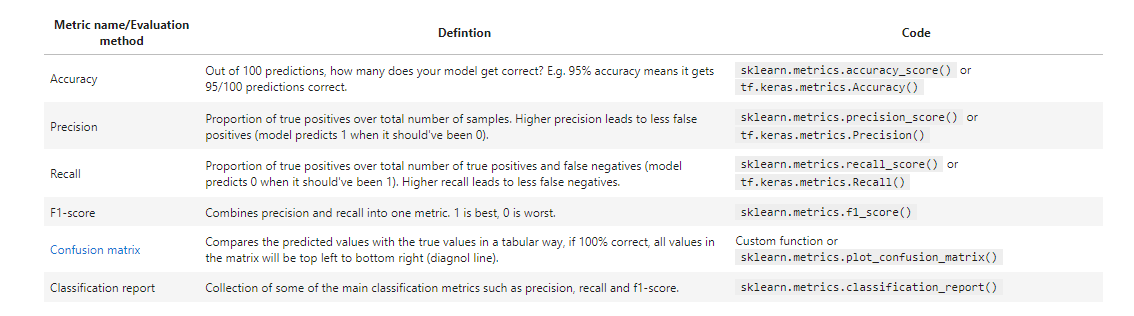

🔑 **Note**: Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed ["accuracy"] to the metrics parameter when we compiled our model, calling evaluate() on it will return the loss as well as accuracy.

In [70]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9800
Model loss on test set: 0.06213851273059845
Model accuracy on test set: 98.00%


How about a confusion matrix?

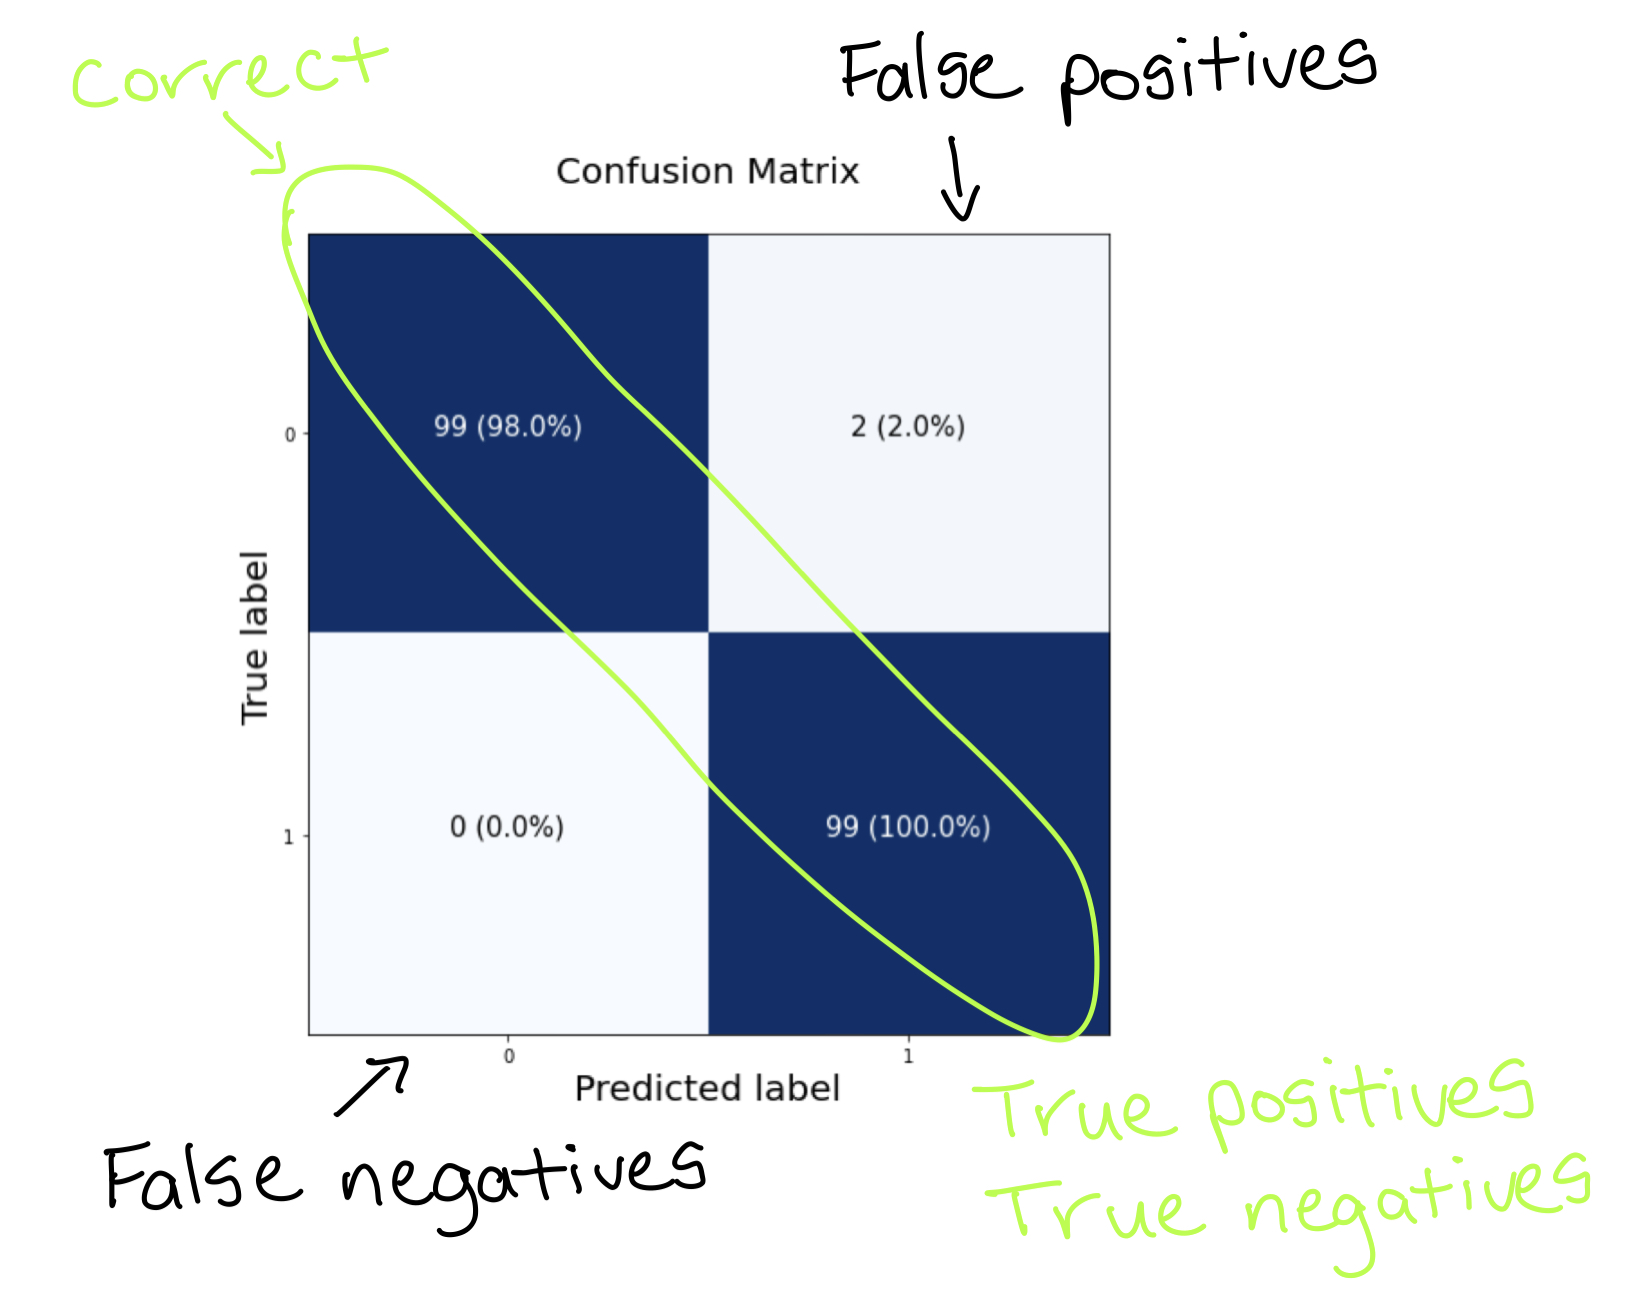

In [71]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Ahh, it seems our predictions aren't in the format they need to be.

Let's check them out.

In [72]:
y_preds[:10]

array([[9.9591923e-01],
       [9.9591923e-01],
       [9.9591923e-01],
       [9.9591923e-01],
       [2.1702230e-02],
       [1.5541911e-04],
       [9.9591923e-01],
       [8.9314580e-04],
       [9.9591923e-01],
       [4.3171644e-04]], dtype=float32)

In [73]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called prediction probabilities.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().

In [74]:
# Convert prediction probabilities to binary foormat and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Wonderful! Now we can use the confusion_matrix function.



In [75]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]], dtype=int64)

Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

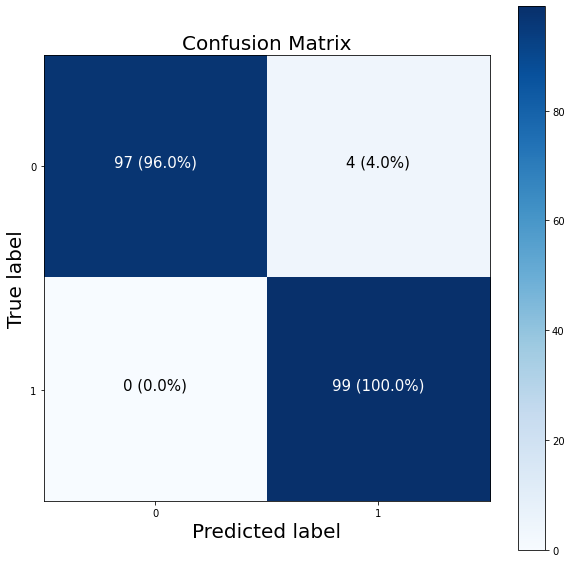

In [76]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]  # Find the number of classes we are dealing with

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

That looks much better. It seems our model has made almost perfect predictions on the test set except for two false positives (top right corner).

In [77]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


# Working with a larger example (multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

📖 **Resource**: The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [124]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [79]:
# Explore the Data
train_data.shape

(60000, 28, 28)

In [80]:
train_data[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [81]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [82]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [83]:
# Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

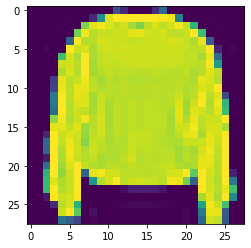

In [84]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [85]:
train_labels[7]

2

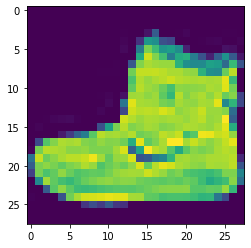

In [86]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on the dataset's GitHub page).

🔑 **Note**: Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [87]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# How many classes are there (this'll be our output shape)?
len(class_names)

10

Now we have these, let's plot another example.

🤔 **Question**: Pay particular attention to what the data we're working with looks like. Is it only straight lines? Or does it have non-straight lines as well? Do you think if we wanted to find patterns in the photos of clothes (which are actually collections of pixels), will our model need non-linearities (non-straight lines) or not?

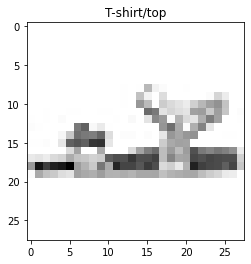

In [88]:
# Plot an example image and its label
index_of_choice = 59999
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)  # change the color to black and white
plt.title(class_names[train_labels[17]]);

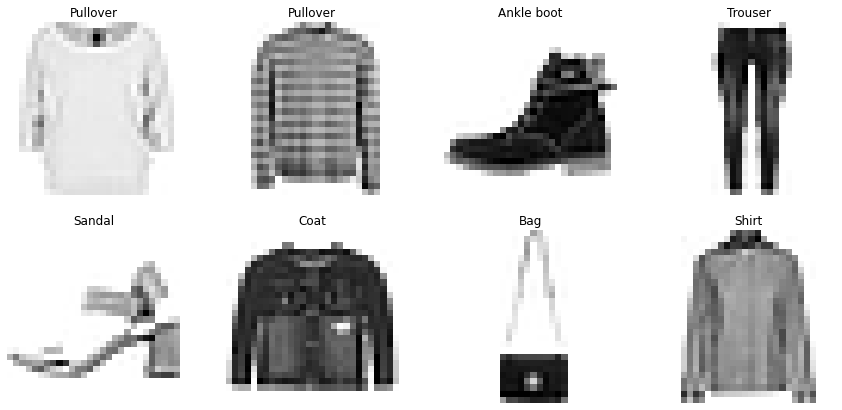

In [89]:
# Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(15, 7))

for i in range(8):
    plt.subplot(2, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
    * We're actually going to squash the input into a tensor (vector) of shape (784).

* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
    * We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.

* We'll need to change our loss function from a binary loss function to a multiclass loss function.
    * More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().

* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [102]:
# What does flatten do?
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [105]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Input layers (We had to reshape 28*28 to 784)
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])


# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, 
                            validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.1608 - accuracy: 0.1639 - val_loss: 1.7971 - val_accuracy: 0.2073
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7081 - accuracy: 0.2487 - val_loss: 1.6460 - val_accuracy: 0.2800
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6278 - accuracy: 0.2824 - val_loss: 1.6023 - val_accuracy: 0.2910
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6092 - accuracy: 0.2827 - val_loss: 1.5968 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5956 - accuracy: 0.2927 - val_loss: 1.5808 - val_accuracy: 0.3039
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5921 - accuracy: 0.3008 - val_loss: 1.5695 - val_accuracy: 0.3060
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.5806 - accuracy: 0.3111 - val_loss: 1.5695 - val_ac

If we didn't want to use SparseCategoricalCrossentropy(), we can one_hot encode the labels(train_label) and pass it to model.fit()

In [108]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [152]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Input layers (We had to reshape 28*28 to 784)
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])


# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, 
                            validation_data = (test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [112]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Alright, our model gets to about ~35% accuracy after 10 epochs using a similar style model to what we used on our binary classification problem.

Which is better than guessing (guessing with 10 classes would result in about 10% accuracy) but we can do better.

Do you remember when we talked about neural networks preferring numbers between 0 and 1? (if not, treat this as a reminder)

Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the non_norm_history variable when calling fit()). It's pixel values are between 0 and 255.

Let's see.

In [116]:
# Check the min and max values of trainig data
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as **scaling** or **normalization**).

In [125]:
# Divide the train data and test data by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Beautiful! Now our data is between 0 and 1. Let's see what happens when we model it.

We'll use the same model as before (model_11) except this time the data will be normalized.

In [133]:
# Set the Random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model(to the normalized data)
norm_history = model_12.fit(train_data, train_labels, epochs=10,
                           validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

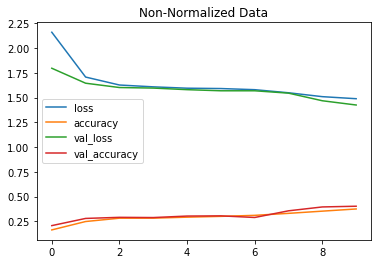

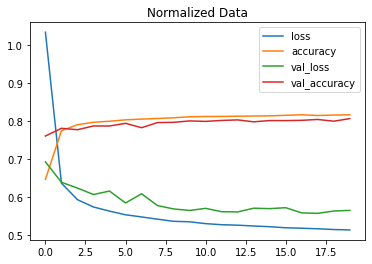

In [132]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

# Plot Normalized Data Loss Curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data");

Wow. From these two plots, we can see how much quicker our model with the normalized data (model_12) improved than the model with the non-normalized data (model_11).

🔑 **Note**: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

In [141]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data, train_labels,
                              epochs=40,
                              validation_data = (test_data, test_labels),
                              callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

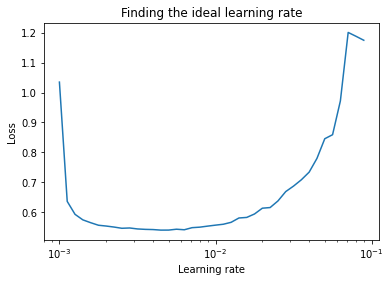

In [150]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [149]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [169]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 


import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrics(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  


    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]  # Find the number of classes we are dealing with

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    # Are there a list of classes?
    
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()


    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=text_size)

Since a confusion matrix compares the truth labels (test_labels) to the predicted labels, we have to make some predictions with our model.

In [154]:
# Mmake prediction with most recent model
y_probs = model_14.predict(test_data) # 'prob' is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5629982e-11, 3.5361769e-13, 2.6633732e-05, 4.6356295e-08,
        5.0949817e-05, 9.6118927e-02, 8.1778047e-08, 9.1869034e-02,
        4.0605087e-03, 8.0787373e-01],
       [3.4278621e-06, 1.2899216e-16, 9.5989150e-01, 2.0516354e-07,
        1.5329231e-02, 2.4532478e-13, 2.4142873e-02, 1.1383274e-28,
        6.3272589e-04, 4.4789129e-08],
       [6.1062710e-05, 9.9657673e-01, 4.3866475e-08, 3.3405658e-03,
        1.3249347e-05, 1.4383106e-21, 8.2789820e-06, 7.3236338e-18,
        5.4810872e-08, 4.9224388e-14],
       [7.5031574e-05, 9.9053687e-01, 4.2528450e-07, 9.2231557e-03,
        1.3623078e-04, 1.8276090e-18, 2.6808242e-05, 4.8123635e-14,
        1.4521424e-06, 2.2211207e-11],
       [7.2189875e-02, 1.5495756e-06, 2.5566894e-01, 1.0363093e-02,
        4.3541376e-02, 1.1069410e-13, 6.1693031e-01, 6.7543142e-23,
        1.3049159e-03, 1.2140315e-09]], dtype=float32)

Our model outputs a list of **prediction probabilities**, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the **argmax()** method.

In [155]:
# See the predicted class number and label for thr first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [156]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

Wonderful, now we've got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels.

In [158]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

That confusion matrix is hard to comprehend, let's make it prettier using the function we created before.

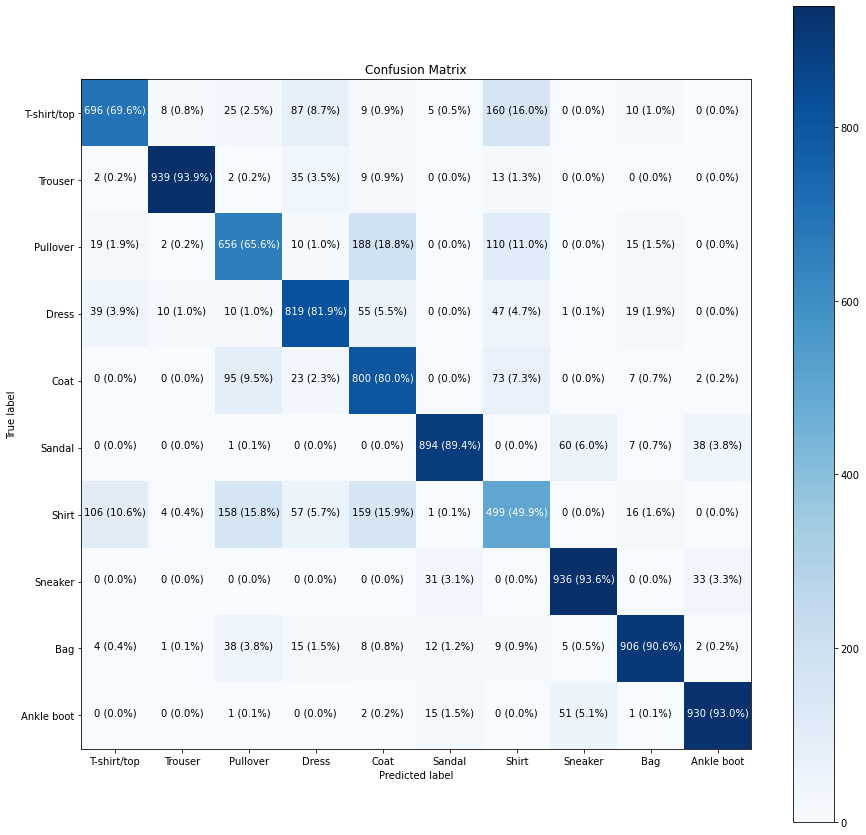

In [170]:
# Make a prettier confusion matrix
make_confusion_matrics(y_true = test_labels,
                     y_pred = y_preds,
                     classes = class_names,
                     figsize = (15, 15),
                     text_size = 10)

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

     🤔 **Question**: Does it make sense that our model is getting confused between the Shirt and T-shirt/top classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

     🔑 **Note**: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [203]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 

    # Setup random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_images = images[i]
    pred_probs = model.predict(target_images.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the target image
    plt.imshow(target_images, cmap = plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is the right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

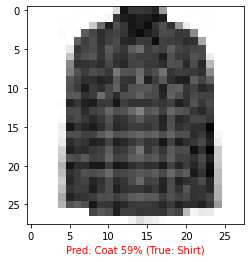

In [213]:
# Check out a random image as well as its prediction
plot_random_image(model = model_14,
                 images = test_data,
                 true_labels = test_labels,
                 classes = class_names)

After running the cell above a few times you'll start to get a visual understanding of the relationship between the model's predictions and the true labels.

Did you figure out which predictions the model gets confused on?

It seems to mix up classes which are similar, for example, Sneaker with Ankle boot.

Looking at the images, you can see how this might be the case.

The overall shape of a Sneaker and an Ankle Boot are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.

## What pattern is our model learning?

We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (model_14) using the layers attribute.

In [214]:
# Find the layers of our most recent model
model_14.layers

We can access a target layer using indexing.

In [215]:
# Extract a particular layer
model_14.layers[1]

And we can find the patterns learned by a particular layer using the get_weights() method.

The get_weights() method returns the weights (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [216]:
# Get the petterns of a layer in our neural network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.7150266 , -0.06077086, -0.9976308 , -1.0484312 ],
        [ 0.27732116, -0.47155362, -0.5291646 ,  0.02329238],
        [ 0.7752429 ,  0.54027545, -1.1288568 , -0.74261546],
        ...,
        [-0.39453447,  0.47628677, -0.22641525,  0.25505912],
        [-0.40515828,  0.61810106,  0.23928423, -0.5038759 ],
        [ 0.23884551,  0.11606929, -0.12131333,  0.04352404]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

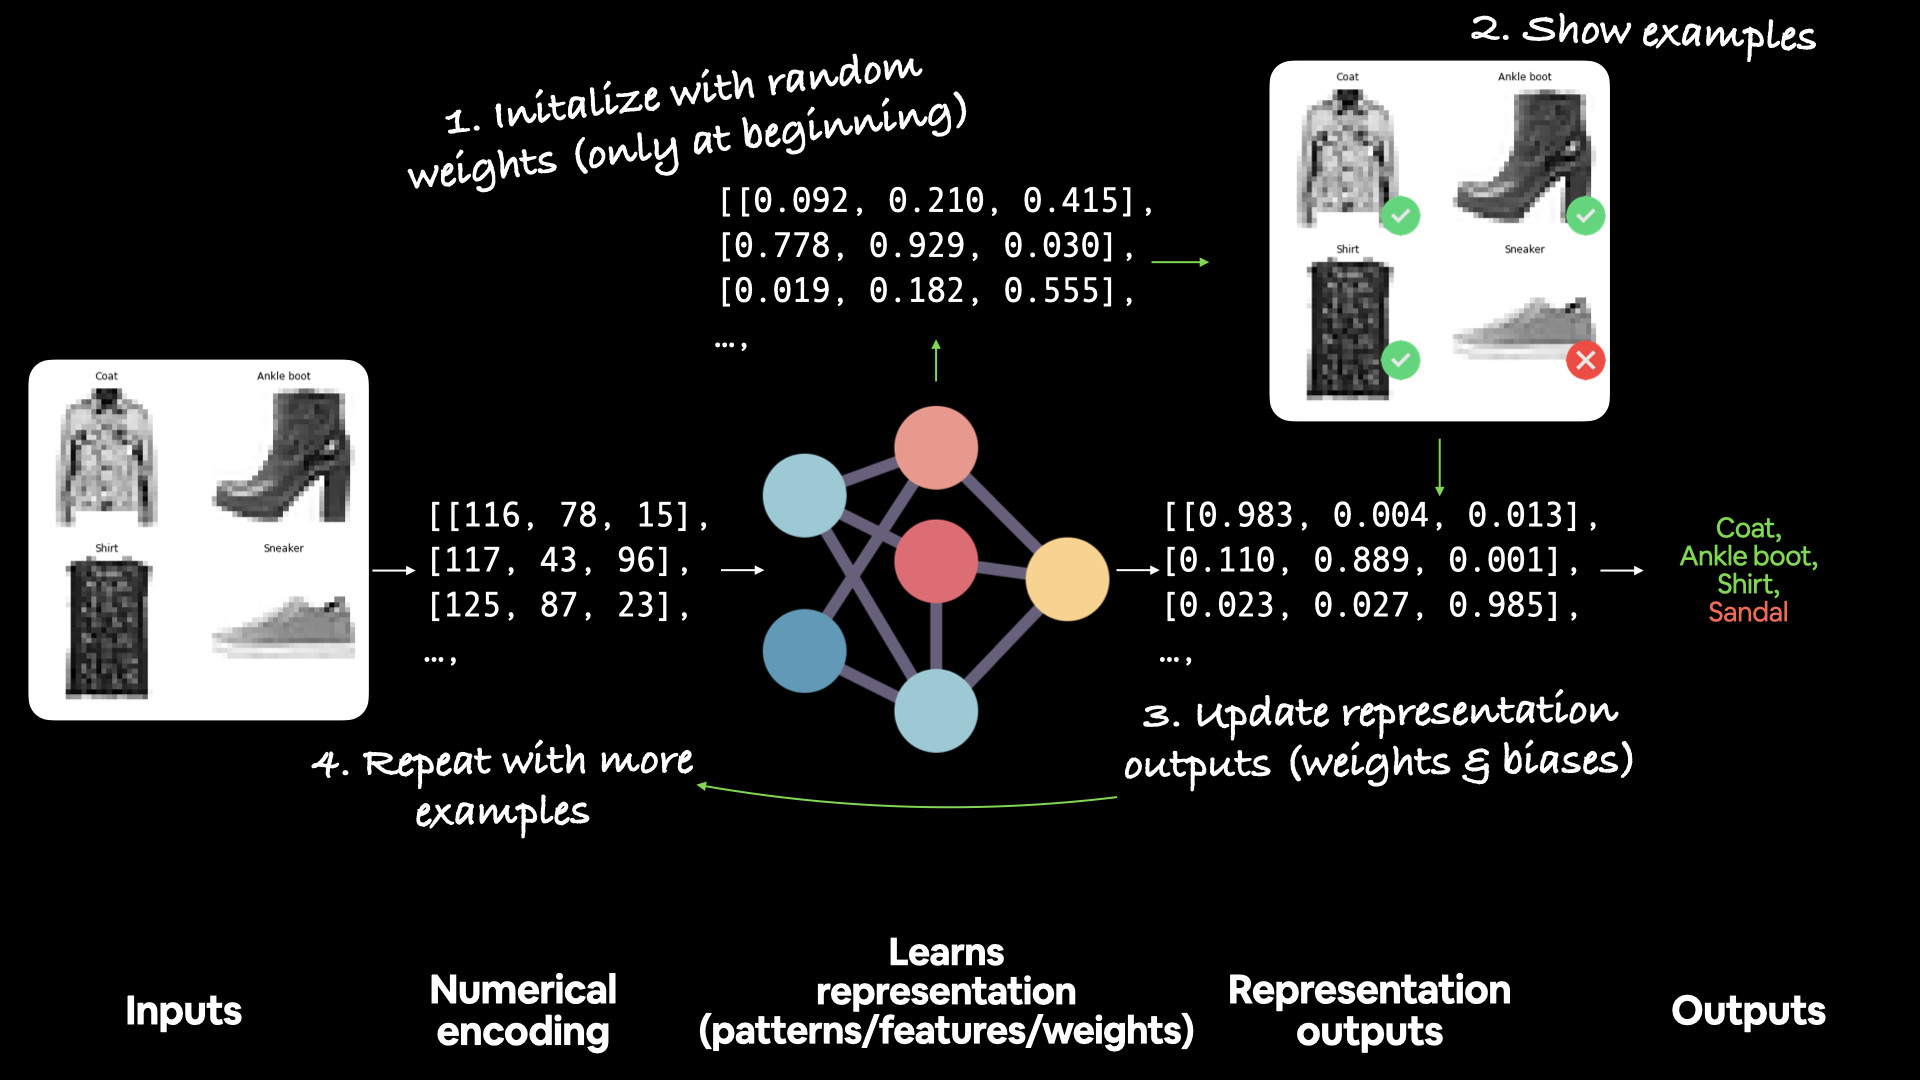

Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.

Now let's check out the bias vector.

In [218]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.4486070e-02, -6.1512832e-04, -2.7230212e-01,  8.1124848e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [219]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_81 (Dense)            (None, 4)                 3140      
                                                                 
 dense_82 (Dense)            (None, 4)                 20        
                                                                 
 dense_83 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model().

In [220]:
from tensorflow.keras.utils import plot_model

In [221]:
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


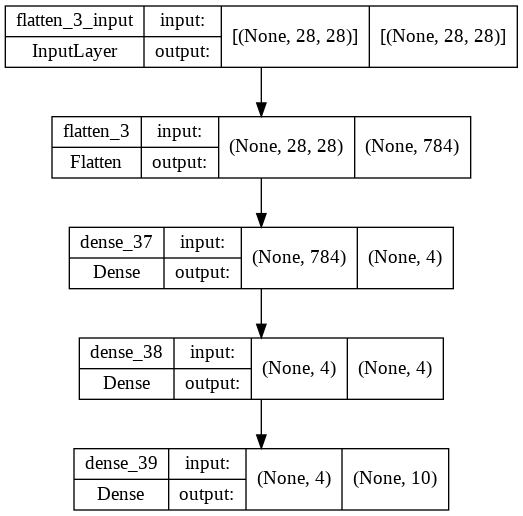

## How a model learns (in brief)

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called **backpropagation**.

In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.